In [16]:
from new_basis_llp_qaoa.statevector_sim.statevector_llp import StateVectorLLP, unitary_b_taylor, unitary_b, unitary_a
from new_basis_llp_qaoa.qaoa.parameters import Parameters
from time import time

In [17]:
import numpy as np
ASList = np.load("../../../resource/sample_matrices/AS-Copy1.npy")
QSList = np.load("../../../resource/sample_matrices/QS-Copy1.npy")
AS = ASList[0]
QS = QSList[0]


def generate_random_dataset(M, N, strength=0.2):
    As = np.zeros((N,N))
    for i in range(N):
        for j in range(i):
            x = np.random.random()
            while x > strength:
                x = np.random.random()
            As[i][j] = x
            As[j][i] = x

    Qs = np.zeros((N,M))
    expected_returns = np.linspace(1/M, 1, M)[:: -1]*(1/M)
    Vs = As.sum(axis=1)
    for i in range(N):
        np.random.shuffle(expected_returns)
        Qs[i, :] = Vs[i] * expected_returns
    return As, Qs
np.random.seed(40)
As, Qs = generate_random_dataset(3,3)
As, Qs

(array([[0.        , 0.05536604, 0.02753468],
        [0.05536604, 0.        , 0.11892465],
        [0.02753468, 0.11892465, 0.        ]]),
 array([[0.02763357, 0.00921119, 0.01842238],
        [0.03873127, 0.0580969 , 0.01936563],
        [0.03254652, 0.01627326, 0.04881978]]))

In [18]:
state = "ones"
p = 1
svllp = StateVectorLLP(Qs, As, 1/20,p, state)



In [19]:
n = svllp.qubits_number
svllp.current_state = np.ones(2**n)/np.sqrt(2**n)

In [20]:
start = time()
res = svllp.run_optimizer(maxiter=100)
print(time() - start)

caching_ha
Constructing profit term


100%|██████████| 3/3 [00:00<00:00, 301.60it/s]


Constructing welfare term


100%|██████████| 3/3 [00:00<00:00, 619.97it/s]


caching_hb
constructing mixer


100%|██████████| 5/5 [00:00<00:00, 1942.71it/s]

constructing UA gate
took 0.0003871917724609375s
constructing UB gate
took 0.01350712776184082s
constructing UA gate
took 0.0002129077911376953s
constructing UB gate
took 0.012328863143920898s
constructing UA gate
took 0.00021886825561523438s
constructing UB gate
took 0.013170003890991211s
constructing UA gate
took 0.00019884109497070312s
constructing UB gate
took 0.012301921844482422s
constructing UA gate
took 0.0002219676971435547s
constructing UB gate
took 0.01232290267944336s
constructing UA gate
took 0.00020694732666015625s
constructing UB gate
took 0.012442827224731445s
constructing UA gate
took 0.00019311904907226562s
constructing UB gate
took 0.012586116790771484s
constructing UA gate
took 0.0001819133758544922s
constructing UB gate
took 0.012205123901367188s
constructing UA gate
took 0.00018405914306640625s
constructing UB gate
took 0.011748790740966797s
constructing UA gate
took 0.00017905235290527344s
constructing UB gate
took 0.009922981262207031s
constructing UA gate
took 


/Users/chayaponthunsetkul/Library/Caches/pypoetry/virtualenvs/newbasisimbq-JkixFnlr-py3.10/lib/python3.10/site-packages/scipy/optimize/_minimize.py:580: RuntimeWarning: Method BFGS cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
/Users/chayaponthunsetkul/Library/Caches/pypoetry/virtualenvs/newbasisimbq-JkixFnlr-py3.10/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
/Users/chayaponthunsetkul/Library/Caches/pypoetry/virtualenvs/newbasisimbq-JkixFnlr-py3.10/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/Users/chayaponthunsetkul/Library/Caches/pypoetry/virtualenvs/newbasisimbq-JkixFnlr-py3.10/lib/python3.10/site-packages/scipy/optimize/_numdiff

took 0.012989282608032227s
constructing UA gate
took 0.00019407272338867188s
constructing UB gate
took 0.013220071792602539s
constructing UA gate
took 0.00019621849060058594s
constructing UB gate
took 0.013174057006835938s
constructing UA gate
took 0.00021886825561523438s
constructing UB gate
took 0.011765003204345703s
constructing UA gate
took 0.0002067089080810547s
constructing UB gate
took 0.012768030166625977s
constructing UA gate
took 0.00018310546875s
constructing UB gate
took 0.012501001358032227s
constructing UA gate
took 0.0002970695495605469s
constructing UB gate
took 0.013563156127929688s
constructing UA gate
took 0.00020194053649902344s
constructing UB gate
took 0.011839866638183594s
constructing UA gate
took 0.0002429485321044922s
constructing UB gate
took 0.011677026748657227s
constructing UA gate
took 0.00022125244140625s
constructing UB gate
took 0.011615991592407227s
constructing UA gate
took 0.00019311904907226562s
constructing UB gate
took 0.01135110855102539s
constr

In [21]:

res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.08971190960141397
        x: [ 4.523e-01 -1.416e-02]
      nit: 9
      jac: [ 1.770e-08 -9.453e-07]
 hess_inv: [[ 1.500e-03  9.331e-06]
            [ 9.331e-06  1.280e-06]]
     nfev: 33
     njev: 11

In [22]:
svllp = StateVectorLLP(Qs, As, 1/20, p, state)
params = res.x
betas = params[:p]
gammas = params[p:]
params = Parameters(
    gamma_list=gammas,
    beta_list=betas
)
svllp.evolve(params)

caching_ha
Constructing profit term


100%|██████████| 3/3 [00:00<00:00, 404.26it/s]


Constructing welfare term


100%|██████████| 3/3 [00:00<00:00, 610.91it/s]


constructing UA gate
took 0.016969919204711914s
caching_hb
constructing mixer


100%|██████████| 5/5 [00:00<00:00, 1433.46it/s]

constructing UB gate
took 0.02241206169128418s


In [23]:
svllp.get_energy(), svllp.get_energy2()

((-0.08971190960141397+1.4073187720834183e-18j), -0.08971190960141395)

In [24]:
# svllp.ha.diagonal()

In [25]:
prob = svllp.probabilities
sum(prob)

0.9999999999999999

In [26]:
top_3 = sorted([(j,i) for i,j in enumerate(svllp.ha.diagonal())])[:3]
top_3 = [j for _,j in top_3]
top_1 = top_3[0]
top_3

[36, 38, 37]

Text(0.5, 0, 'state')

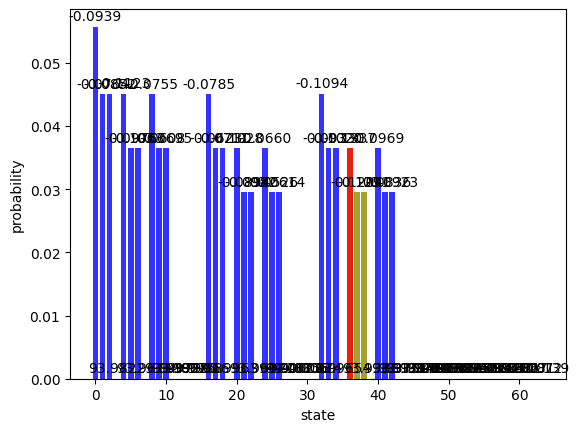

In [27]:
from matplotlib import pyplot as plt
plt.bar(x=range(2**svllp.qubits_number),height=prob, color='b', alpha=0.8)
plt.bar(x=top_3, height=prob[top_3], color='y', alpha=0.8)
plt.bar(x=top_1, height=prob[top_1], color='r', alpha=0.8)
for y, vals in zip(prob, enumerate(svllp.ha.diagonal())):
    x, energy = vals
    plt.text(x= x, y = y+0.001, s= f"{energy}"[:7], horizontalalignment= 'center')
plt.ylabel("probability")
plt.xlabel("state")


In [28]:
from new_basis_llp_qaoa.statevector_sim.statevector_llp import unitary_a


In [29]:
times = []
for n in range(1,6):
    As, Qs = generate_random_dataset(5,n)
    svllp = StateVectorLLP(Qs, As, 1/20, p, state)
    ha =svllp.ha
    start = time()
    ua = unitary_a(ha, 7)
    timed = time()-start
    print(timed)
    times.append(timed)

caching_ha
Constructing profit term


100%|██████████| 1/1 [00:00<00:00, 119.60it/s]


Constructing welfare term


100%|██████████| 1/1 [00:00<00:00, 4364.52it/s]


constructing UA gate
0.0004658699035644531
caching_ha
Constructing profit term


100%|██████████| 2/2 [00:00<00:00, 154.18it/s]


Constructing welfare term


100%|██████████| 2/2 [00:00<00:00, 872.99it/s]


constructing UA gate
0.00023412704467773438
caching_ha
Constructing profit term


100%|██████████| 3/3 [00:00<00:00, 125.69it/s]


Constructing welfare term


100%|██████████| 3/3 [00:00<00:00, 279.38it/s]


constructing UA gate
0.002619028091430664
caching_ha
Constructing profit term


100%|██████████| 4/4 [00:00<00:00, 88.52it/s]


Constructing welfare term


100%|██████████| 4/4 [00:00<00:00, 278.09it/s]


constructing UA gate
0.0008912086486816406
caching_ha
Constructing profit term


100%|██████████| 5/5 [00:00<00:00, 145.55it/s]


Constructing welfare term


100%|██████████| 5/5 [00:00<00:00, 132.59it/s]

constructing UA gate
0.0029599666595458984


[0.0004658699035644531,
 0.00023412704467773438,
 0.002619028091430664,
 0.0008912086486816406,
 0.0029599666595458984]

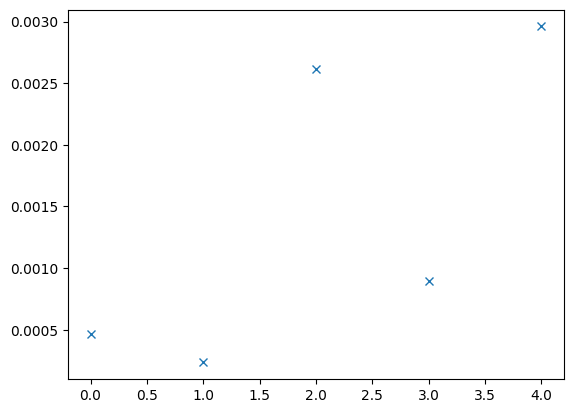

In [30]:
plt.plot(times,'x')
times